In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import wordcloud

import warnings
from collections import Counter
import datetime
import json
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')
# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
%matplotlib notebook
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [2]:
df = pd.read_csv('/Users/zhujinghong/Downloads/5003 project/pre_data/CA_pre.csv')

In [3]:
df.head()

category_id trending_date  \
0           28      18.29.03   
1           24      18.15.04   
2           24      18.03.05   
3           25      18.21.02   
4           10      18.30.01   

                                               title         channel_title  \
0             iPad — Homework (Full Version) — Apple                 Apple   
1  Marc Spelmann gets the first Golden Buzzer of ...  Britain's Got Talent   
2  Dr. Phil To Guest: ‘Have You Been Drinking Tod...              Dr. Phil   
3        PBS NewsHour full episode February 20, 2018          PBS NewsHour   
4  DJ Khaled, Rihanna - Wild Thoughts (2018 Live ...          Super Netvid   

               publish_time  \
0  2018-03-27T16:08:41.000Z   
1  2018-04-14T19:53:33.000Z   
2  2018-05-02T17:43:56.000Z   
3  2018-02-21T00:55:41.000Z   
4  2018-01-29T03:11:56.000Z   

                                                tags    views  likes  \
0  \apple\"|\"ipad\"|\"apple ipad\"|\"apple penci...   816590  24030   
1  \britain's got talent\"|\"britains got talent\...   727663  34107   
2  \series\"|\"host\"|\"news\"|\"dr.\"|\"phil\"|\...    39958    456   
3                                             [none]    39496    260   
4                                             [none]  3014847  42556   

   dislikes  comment_count        category_title  
0      2102              0  Science & Technology  
1       547              0         Entertainment  
2        12              0         Entertainment  
3        27              0       News & Politics  
4      2791              0                 Music

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40870 entries, 0 to 40869
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category_id     40870 non-null  int64 
 1   trending_date   40870 non-null  object
 2   title           40870 non-null  object
 3   channel_title   40870 non-null  object
 4   publish_time    40870 non-null  object
 5   tags            40870 non-null  object
 6   views           40870 non-null  int64 
 7   likes           40870 non-null  int64 
 8   dislikes        40870 non-null  int64 
 9   comment_count   40870 non-null  int64 
 10  category_title  40796 non-null  object
dtypes: int64(5), object(6)
memory usage: 3.4+ MB


### Data cleaning

In [5]:
df[df["category_title"].apply(lambda x: pd.isna(x))].head(3)

category_id trending_date  \
207            29      18.25.02   
1223           29      18.01.01   
1357           29      17.15.11   

                                                  title  channel_title  \
207   Sri Devi Died with Heart Attack-Exclusive Phot...        Yes Man   
1223  Pasteur Grégory Toussaint | 12 Nuits d'Adorati...  Tele Shekinah   
1357  Ex-intelligence chiefs fire back at Trump crit...            CNN   

                  publish_time  \
207   2018-02-25T01:33:22.000Z   
1223  2018-01-01T07:35:22.000Z   
1357  2017-11-12T15:36:51.000Z   

                                                   tags   views  likes  \
207   \Sridevi death\"|\"sri devi body\"|\"sri death...  169105    579   
1223  \I know who I am\"|\"Patience\"|\"Love\"|\"Hea...   26096    788   
1357  \James Clapper\"|\"John Brennan\"|\"President ...  311936   2627   

      dislikes  comment_count category_title  
207        295              0            NaN  
1223        29              4            NaN  
1357      1196           3621            NaN

In [6]:
df=df.dropna(axis=0)

In [7]:
df[df["category_title"].apply(lambda x: pd.isna(x))].head(3)

Empty DataFrame
Columns: [category_id, trending_date, title, channel_title, publish_time, tags, views, likes, dislikes, comment_count, category_title]
Index: []

### Data Analysis

### tags

In [8]:
# 1、Most common words in tags
tags_words = list(df["tags"].apply(lambda x: x.split('|')))
tags_words = [x for y in tags_words for x in y]
Counter(tags_words).most_common(25)

[('\\"funny\\"', 3291),
 ('[none]', 2378),
 ('\\"comedy\\"', 2318),
 ('\\"news\\"', 1261),
 ('\\"video\\"', 989),
 ('\\"2018\\"', 965),
 ('\\"humor\\"', 959),
 ('\\"politics\\"', 941),
 ('\\"food\\"', 885),
 ('\\"reaction\\"', 845),
 ('\\"music\\"', 805),
 ('\\"review\\"', 783),
 ('\\"talk show\\"', 754),
 ('\\"family friendly\\"', 732),
 ('\\"comedian\\"', 722),
 ('\\"interview\\"', 717),
 ('\\"2017\\"', 689),
 ('\\"funny videos\\"', 646),
 ('\\"donald trump\\"', 626),
 ('\\"react\\"', 624),
 ('\\"trump\\"', 616),
 ('\\"television\\"', 603),
 ('\\"News\\"', 595),
 ('\\"how to\\"', 570),
 ('\\"Donald Trump\\"', 569)]

<IPython.core.display.Javascript object>


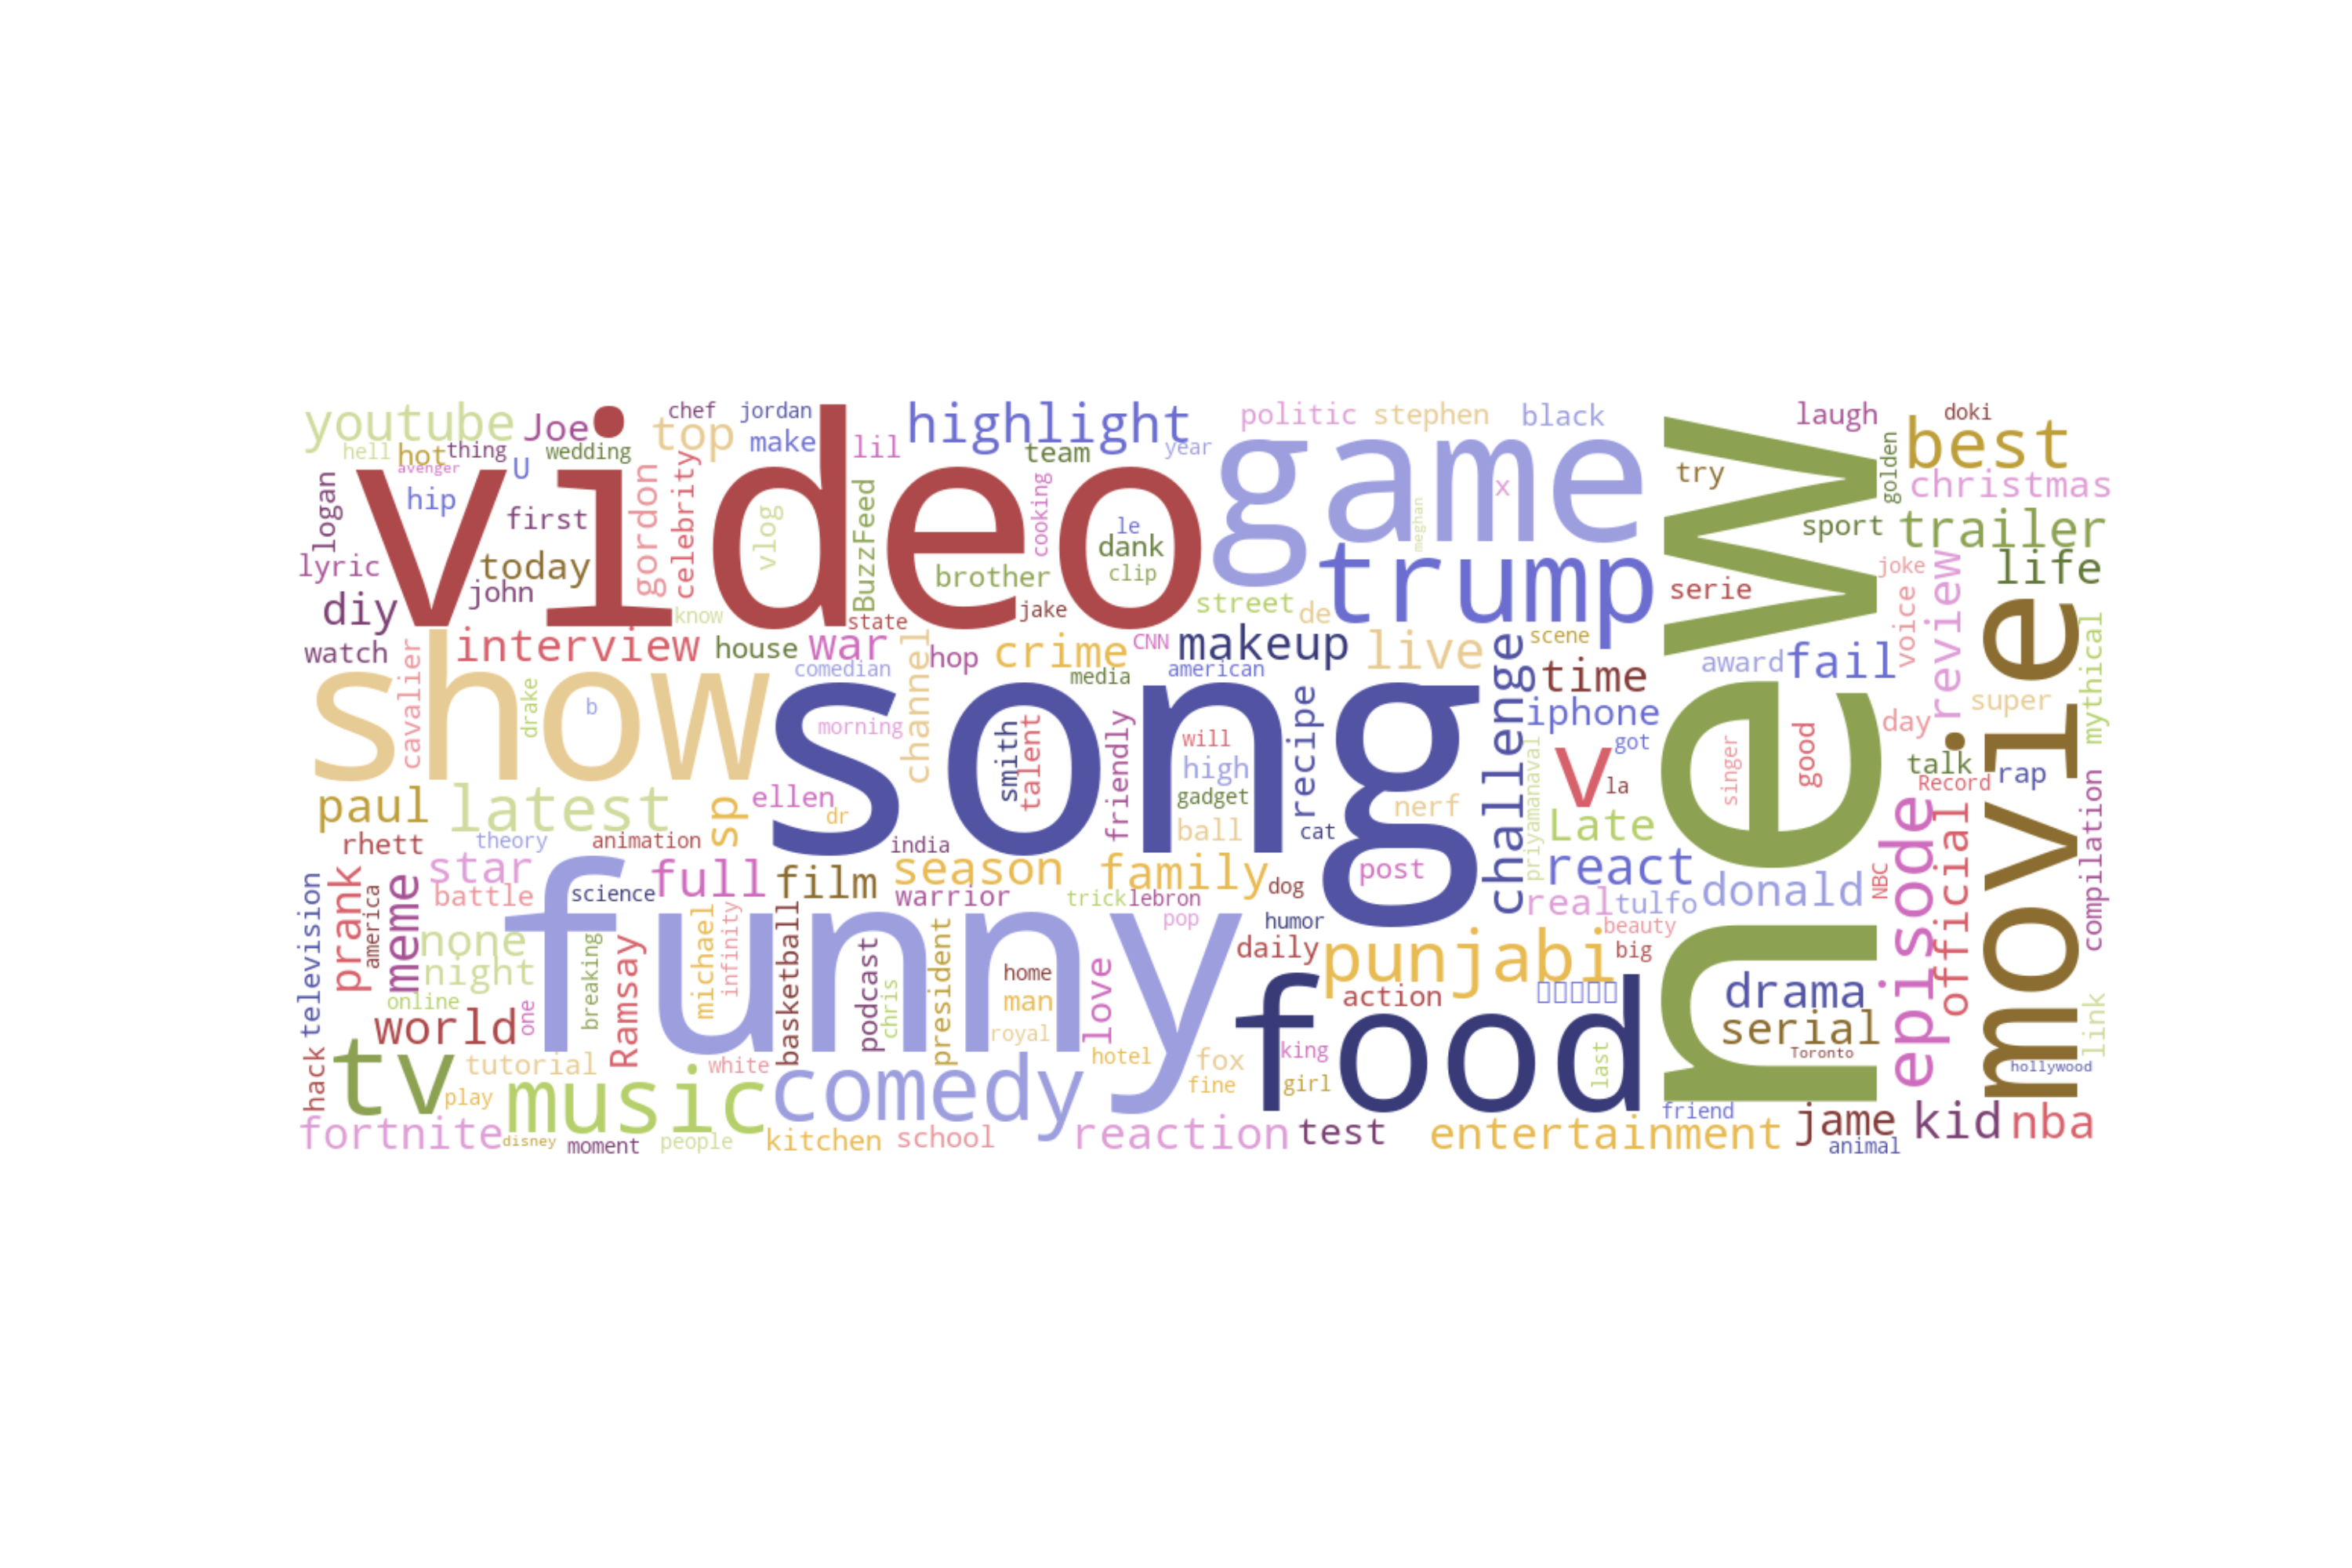

In [9]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(tags_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

### titles

In [10]:
# 2、Most common words in video titles
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 12659),
 ('|', 12546),
 ('The', 5160),
 ('2018', 3748),
 ('the', 2495),
 ('Episode', 2297),
 ('&', 2284),
 ('to', 1901),
 ('in', 1794),
 ('of', 1762),
 ('and', 1696),
 ('A', 1521),
 ('on', 1383),
 ('To', 1316),
 ('a', 1279),
 ('with', 1199),
 ('2017', 1194),
 ('vs', 1176),
 ('Game', 1094),
 ('Full', 1056),
 ('2', 1030),
 ('Trump', 959),
 ('Official', 930),
 ('In', 929),
 ('Video)', 926)]

<IPython.core.display.Javascript object>


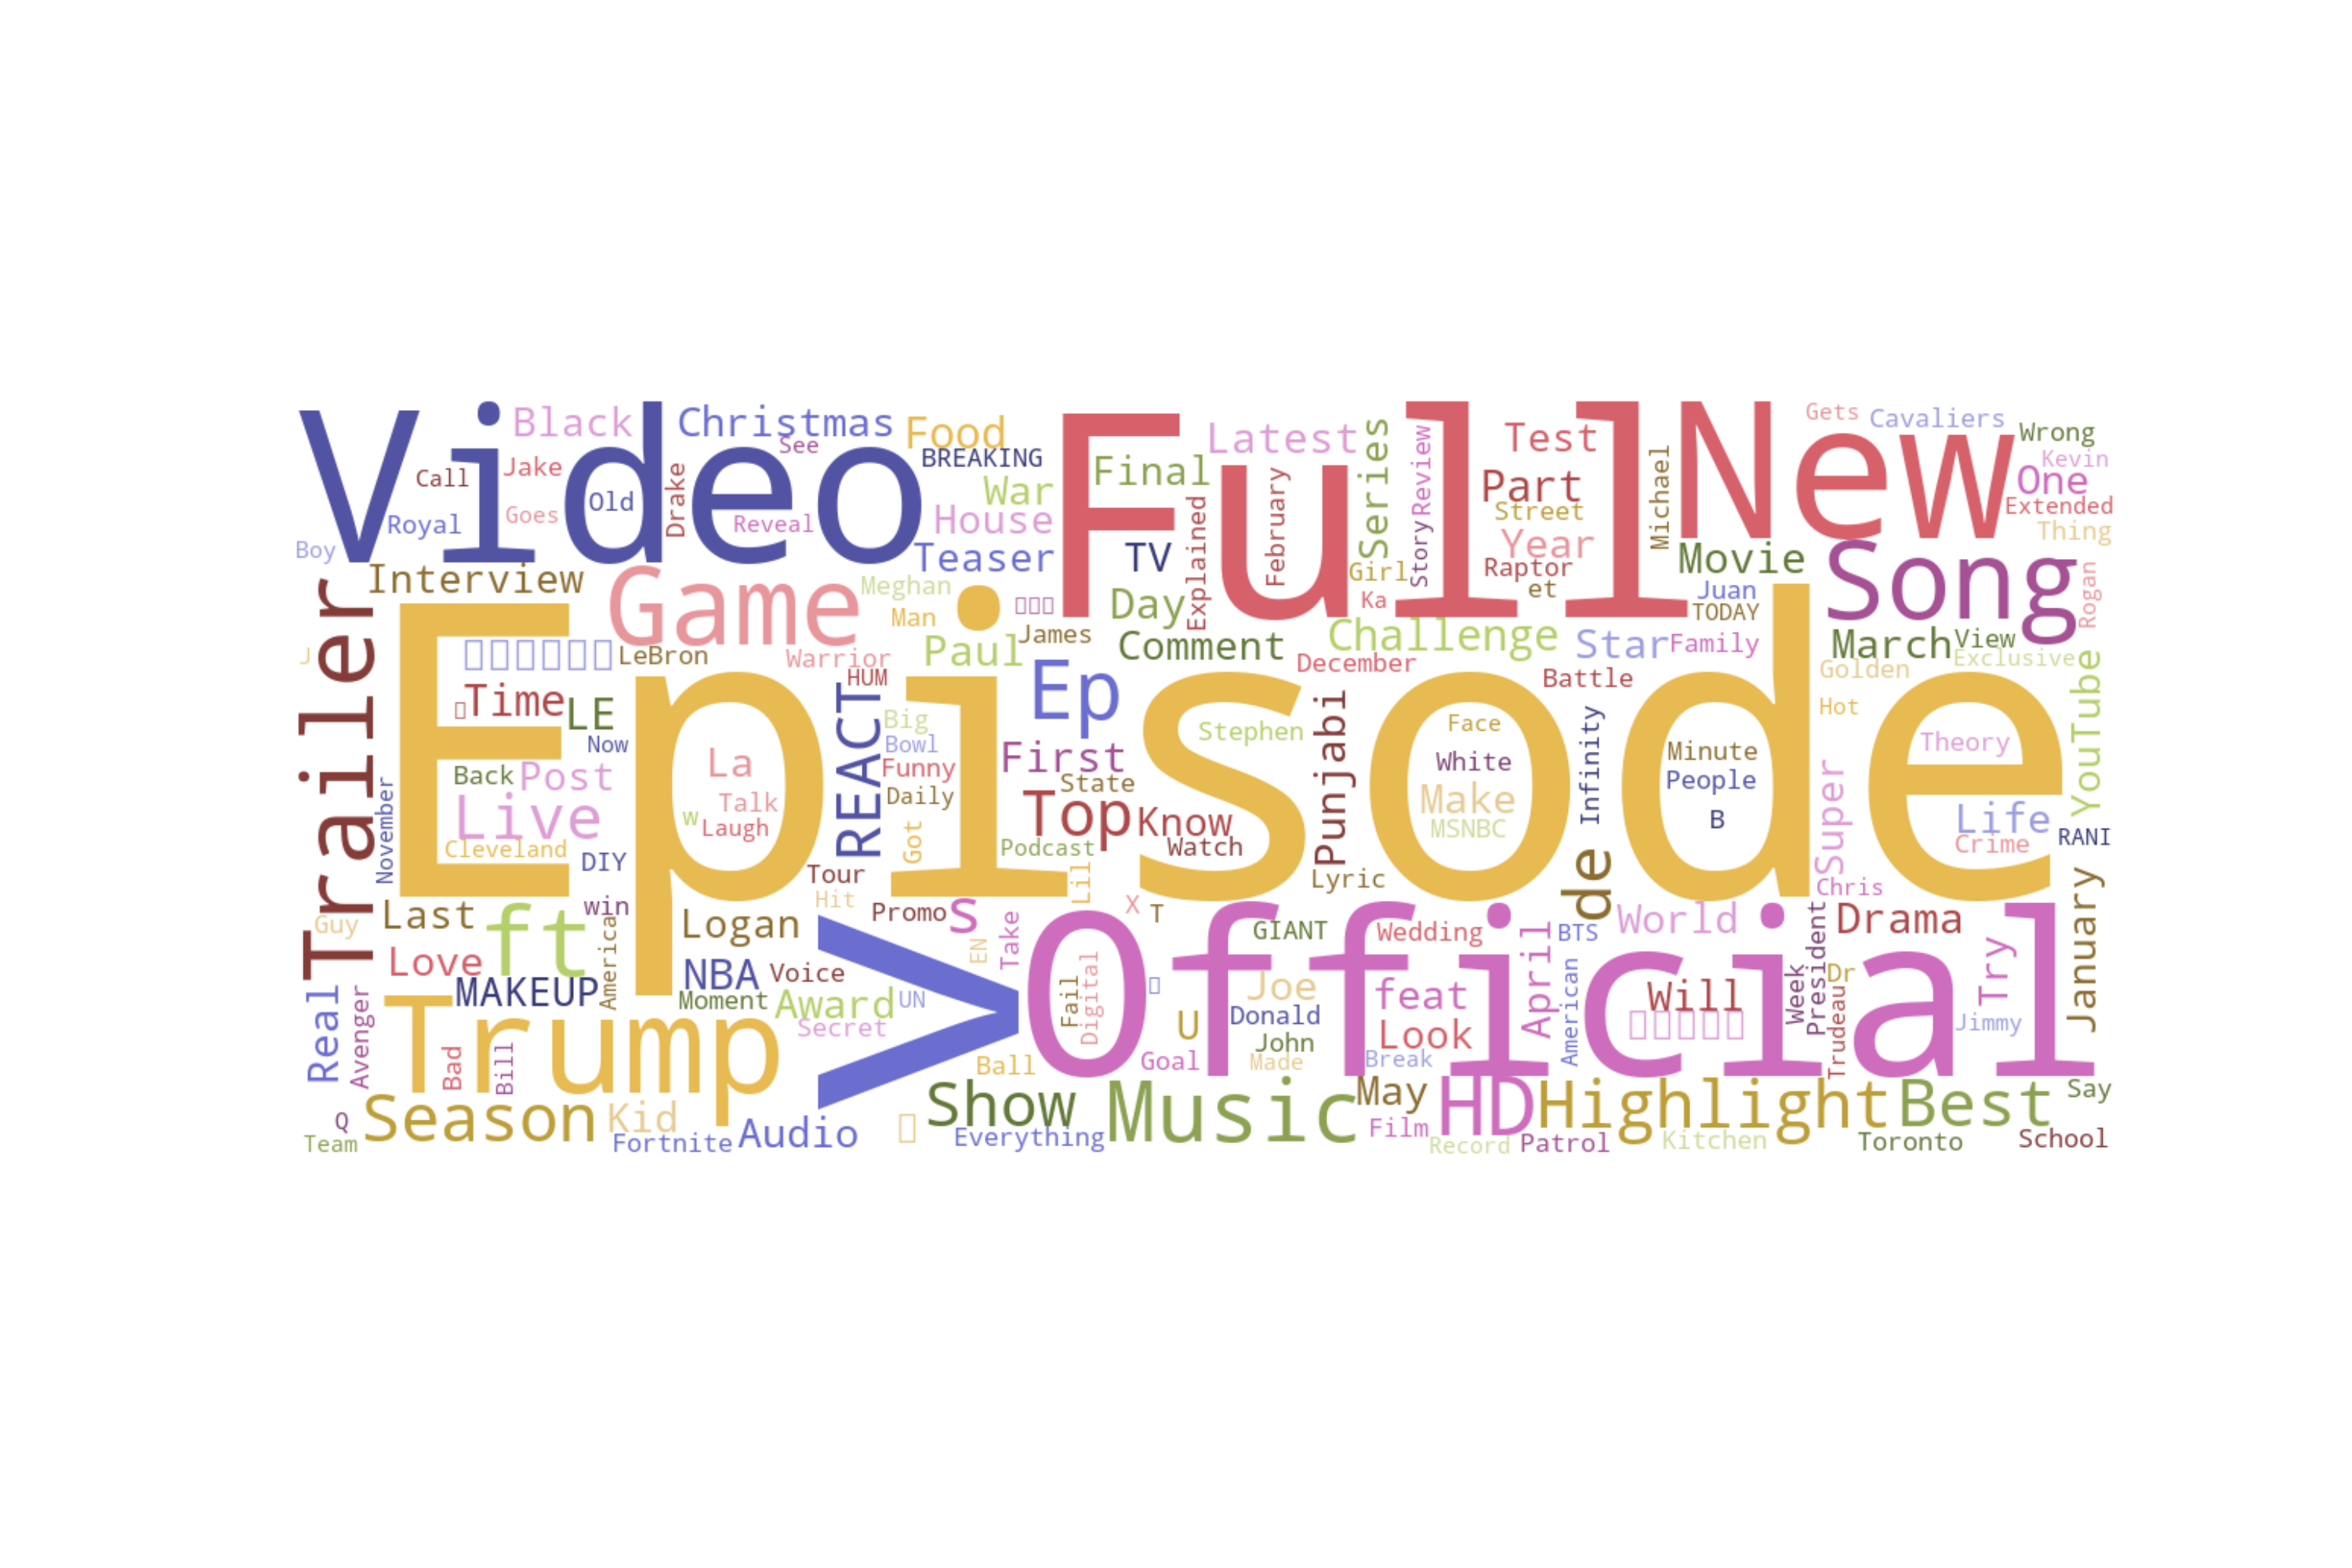

In [11]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

### titles length

<IPython.core.display.Javascript object>


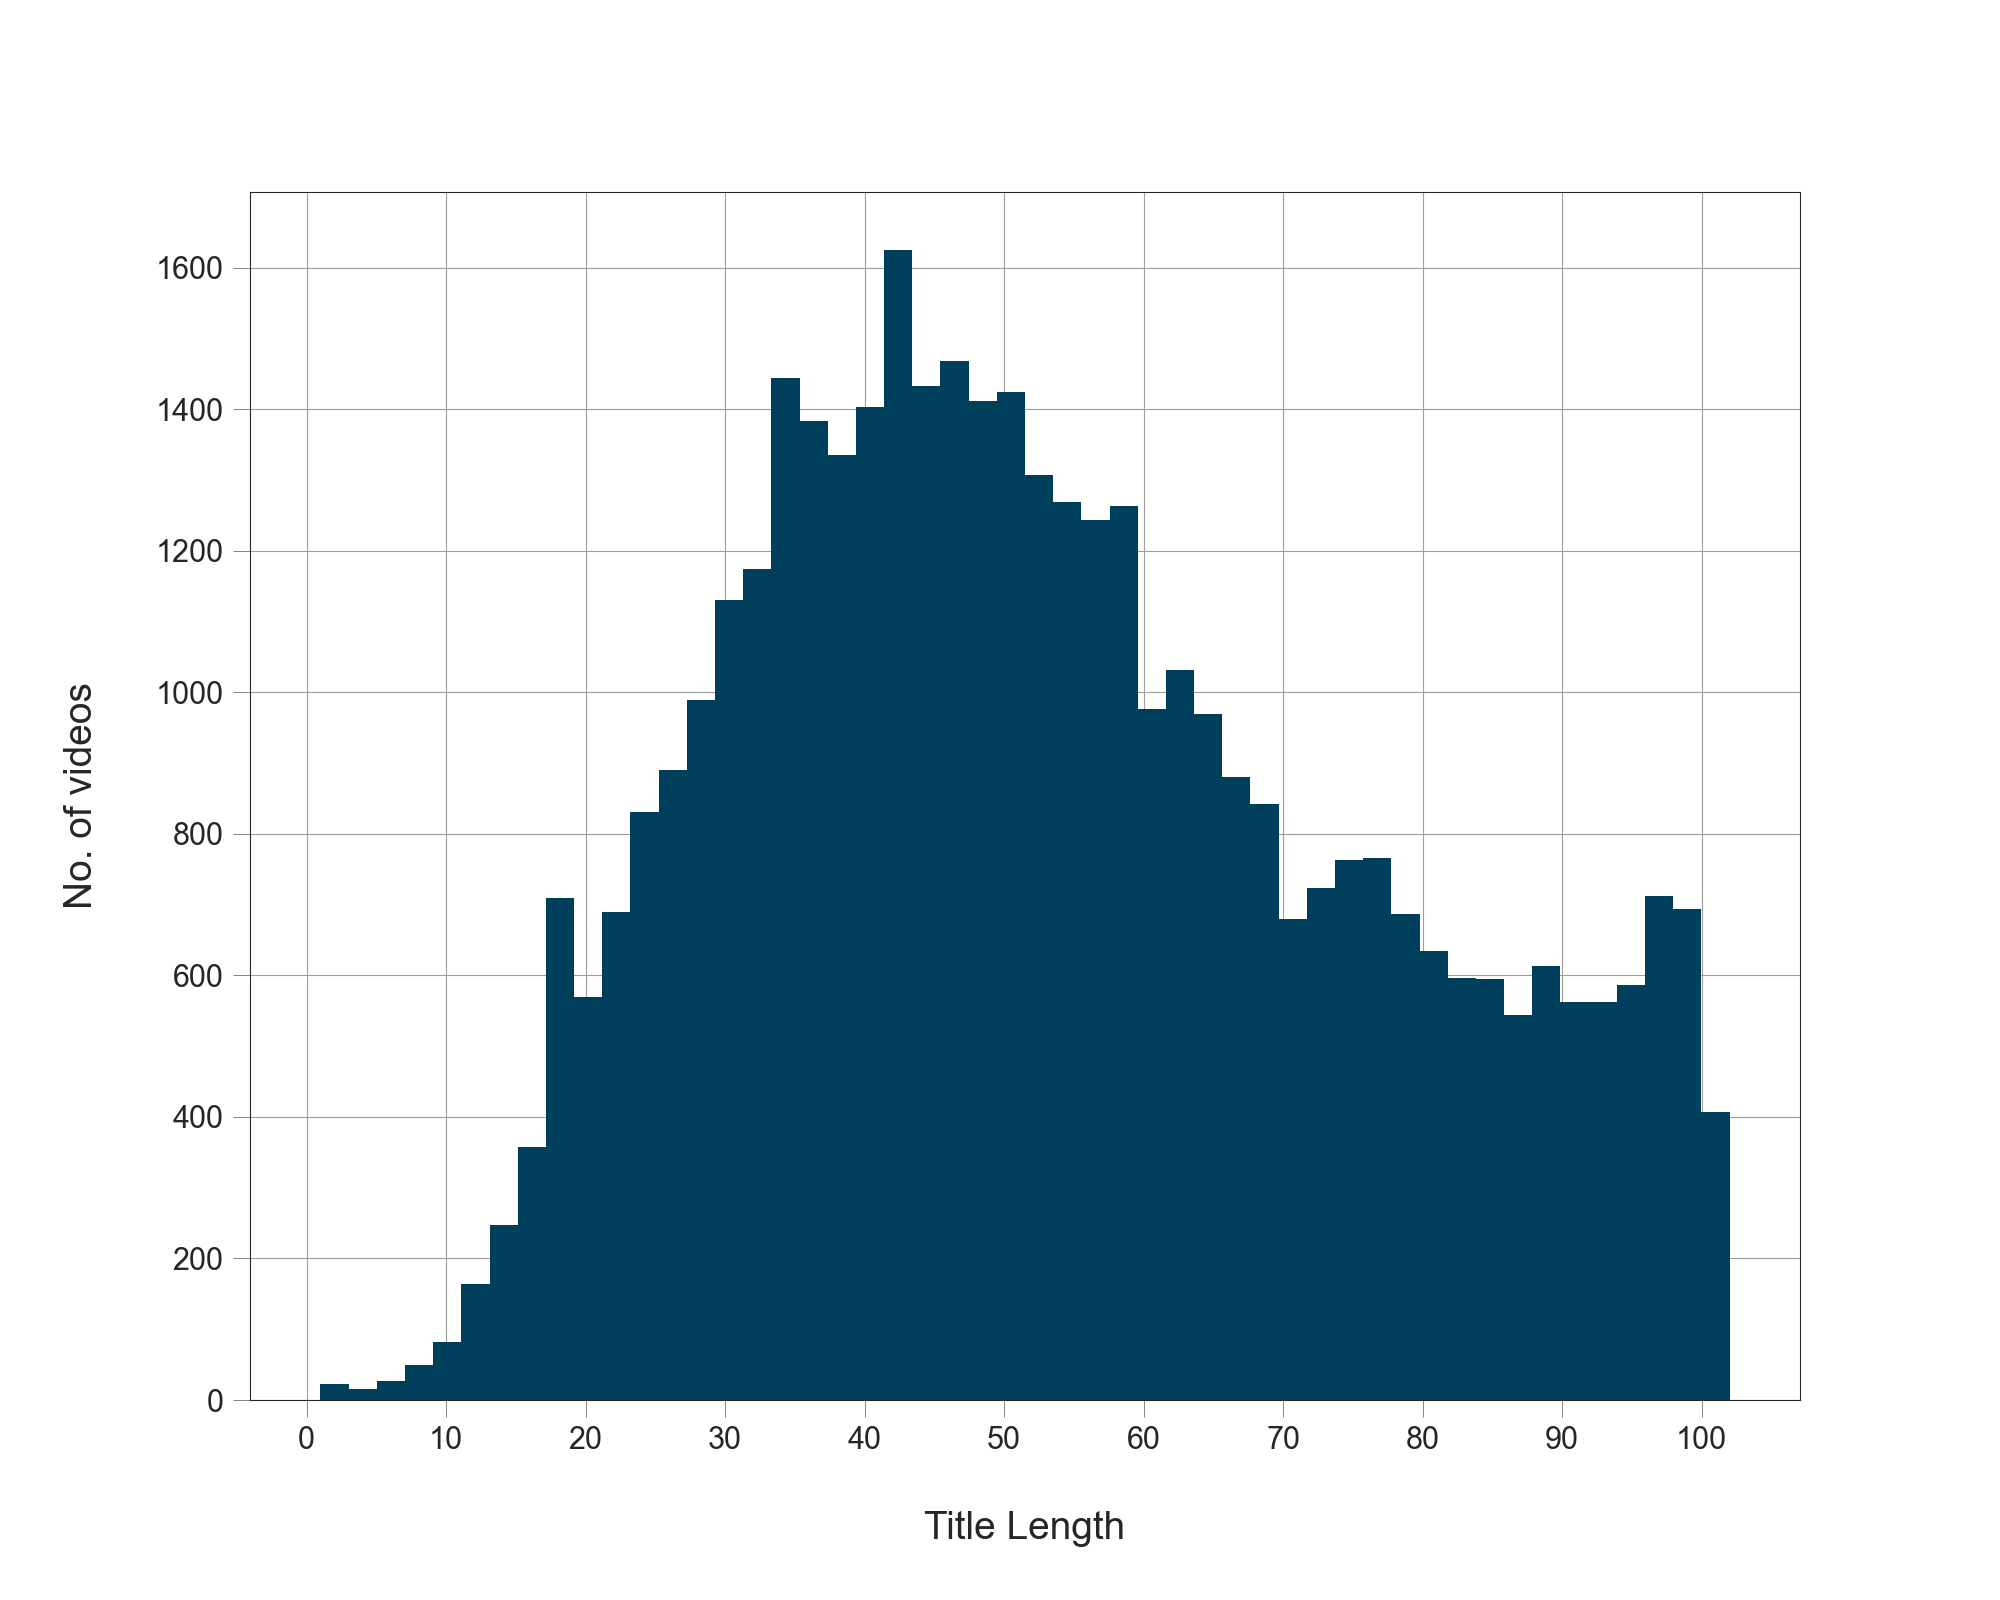

In [12]:
# the lengths of trending video titles
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots(figsize=(10,8))
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

<IPython.core.display.Javascript object>


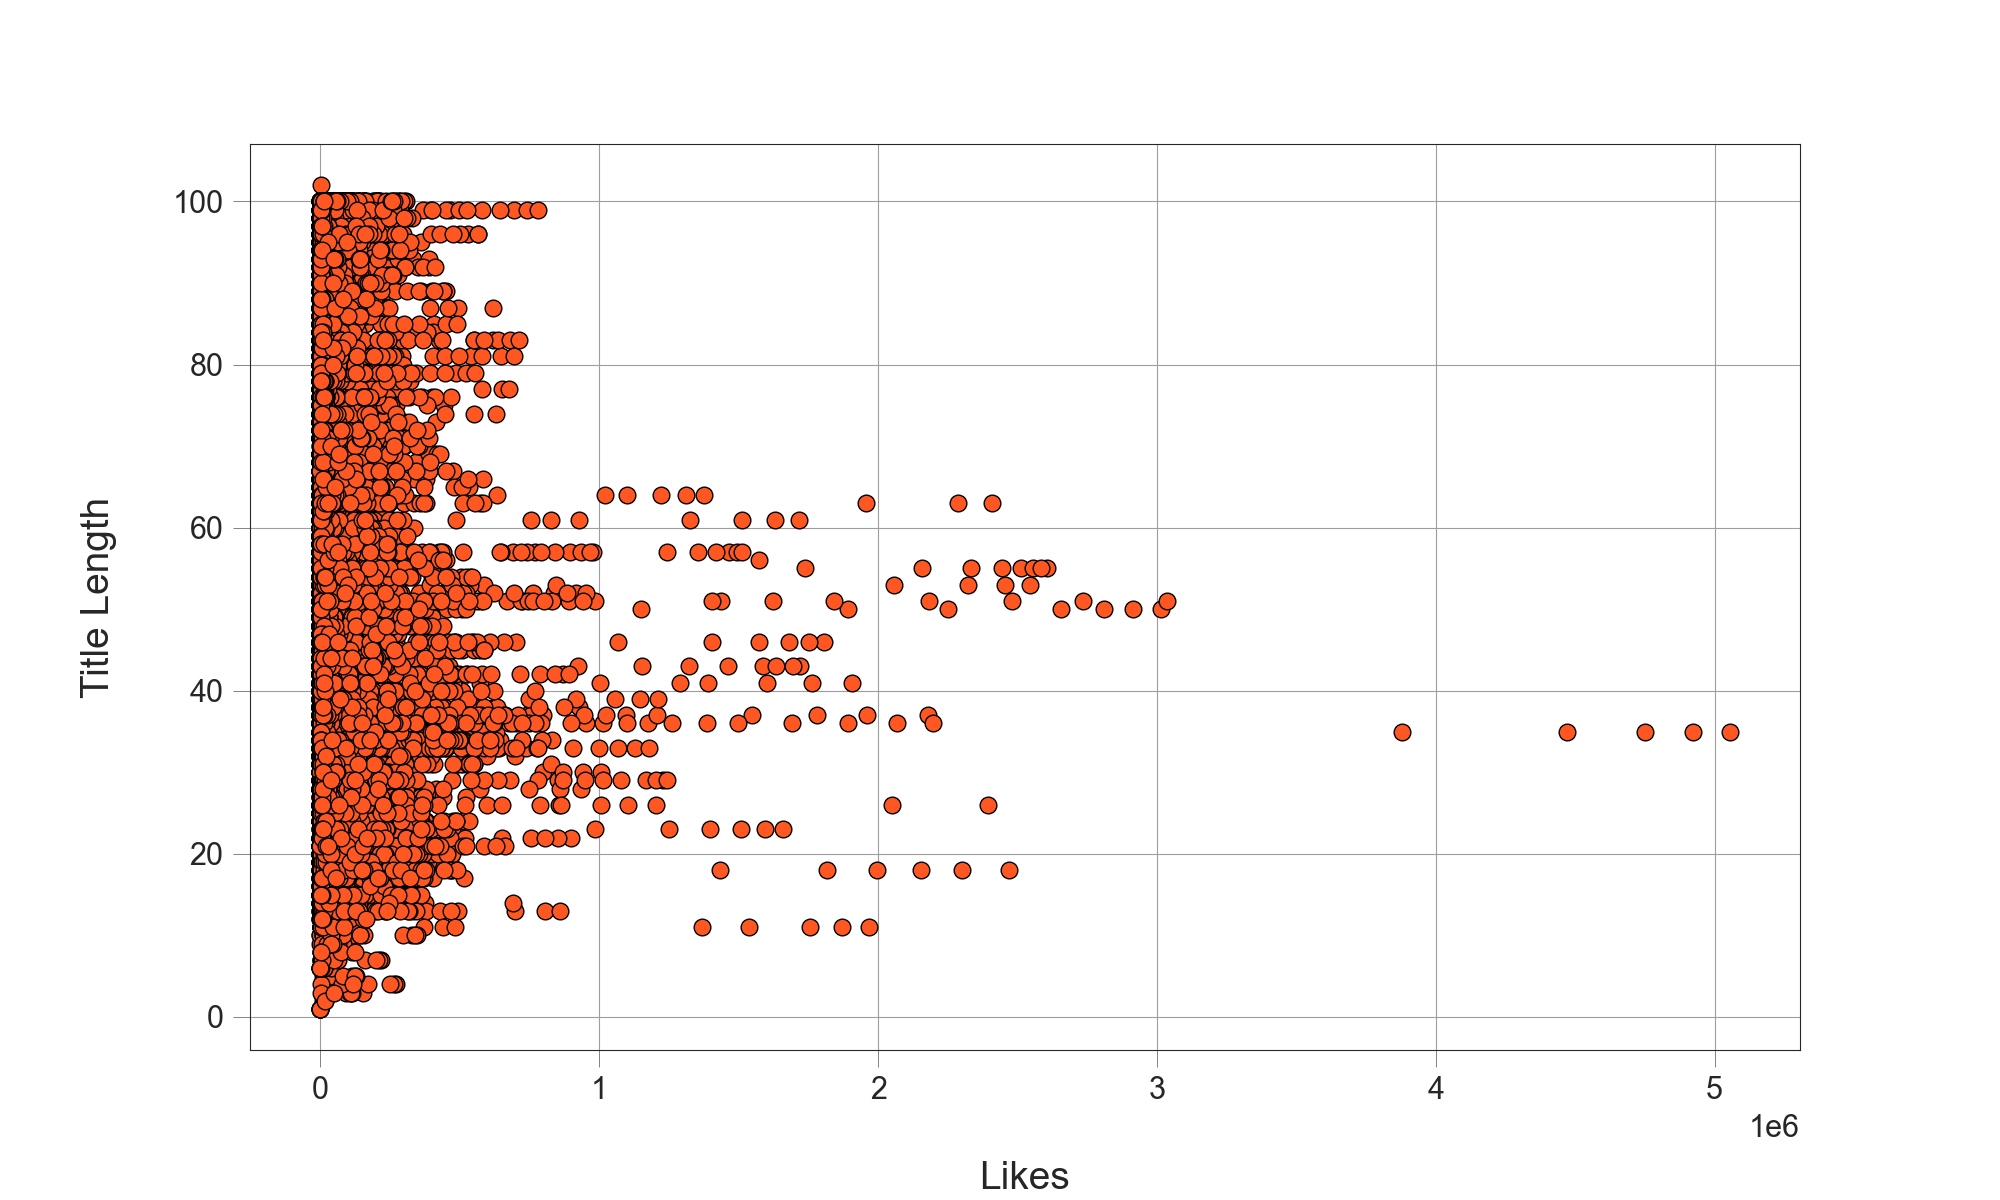

In [64]:
# visualize the relationship between title length and likes
fig, ax = plt.subplots(figsize=(10,6))
_ = plt.scatter( x=df['likes'],y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(ylabel="Title Length", xlabel="Likes")

<IPython.core.display.Javascript object>


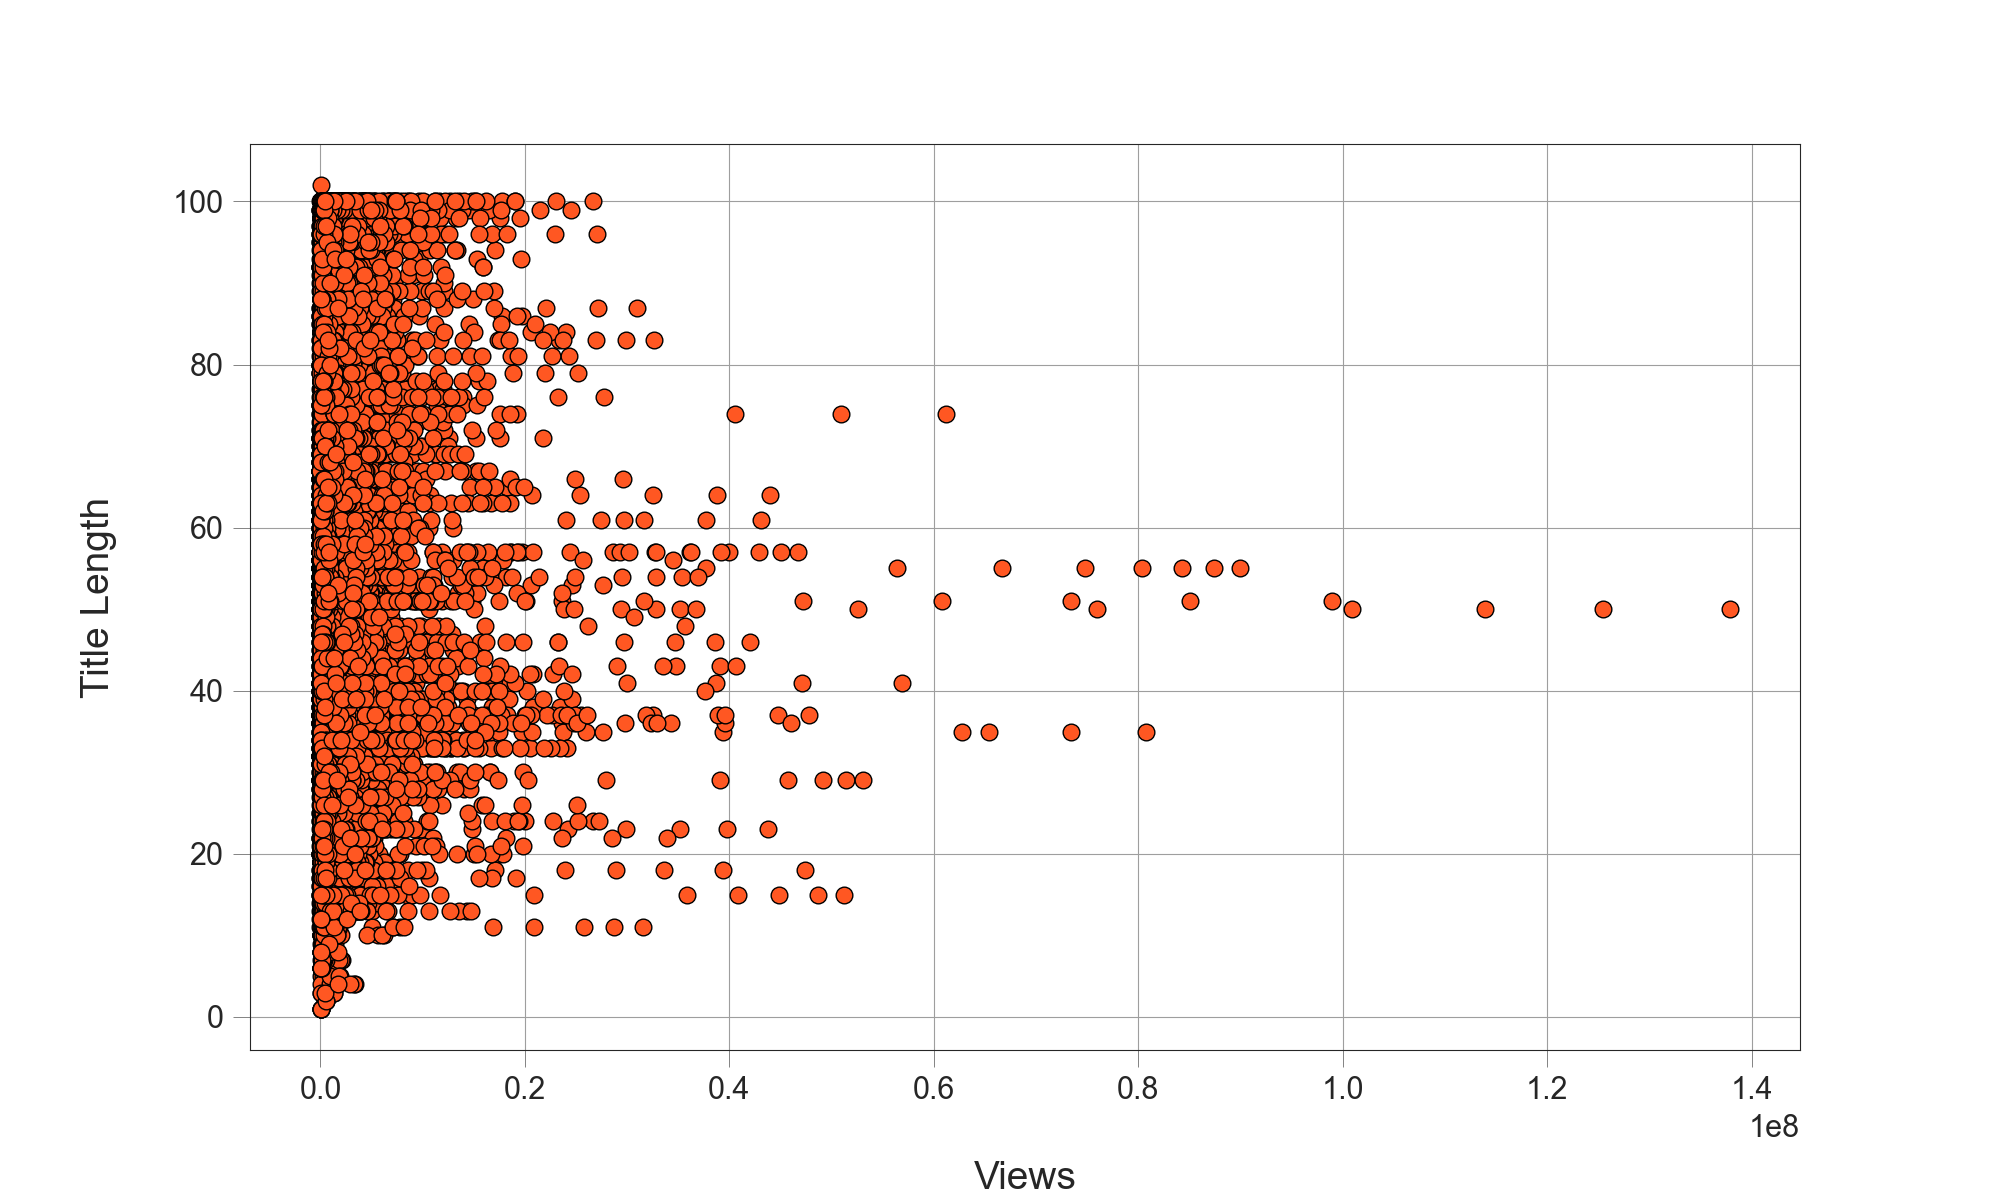

In [14]:

fig, ax = plt.subplots(figsize=(10,6))
_ = plt.scatter( x=df['views'],y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(ylabel="Title Length", xlabel="Views")

### category_title 

<IPython.core.display.Javascript object>


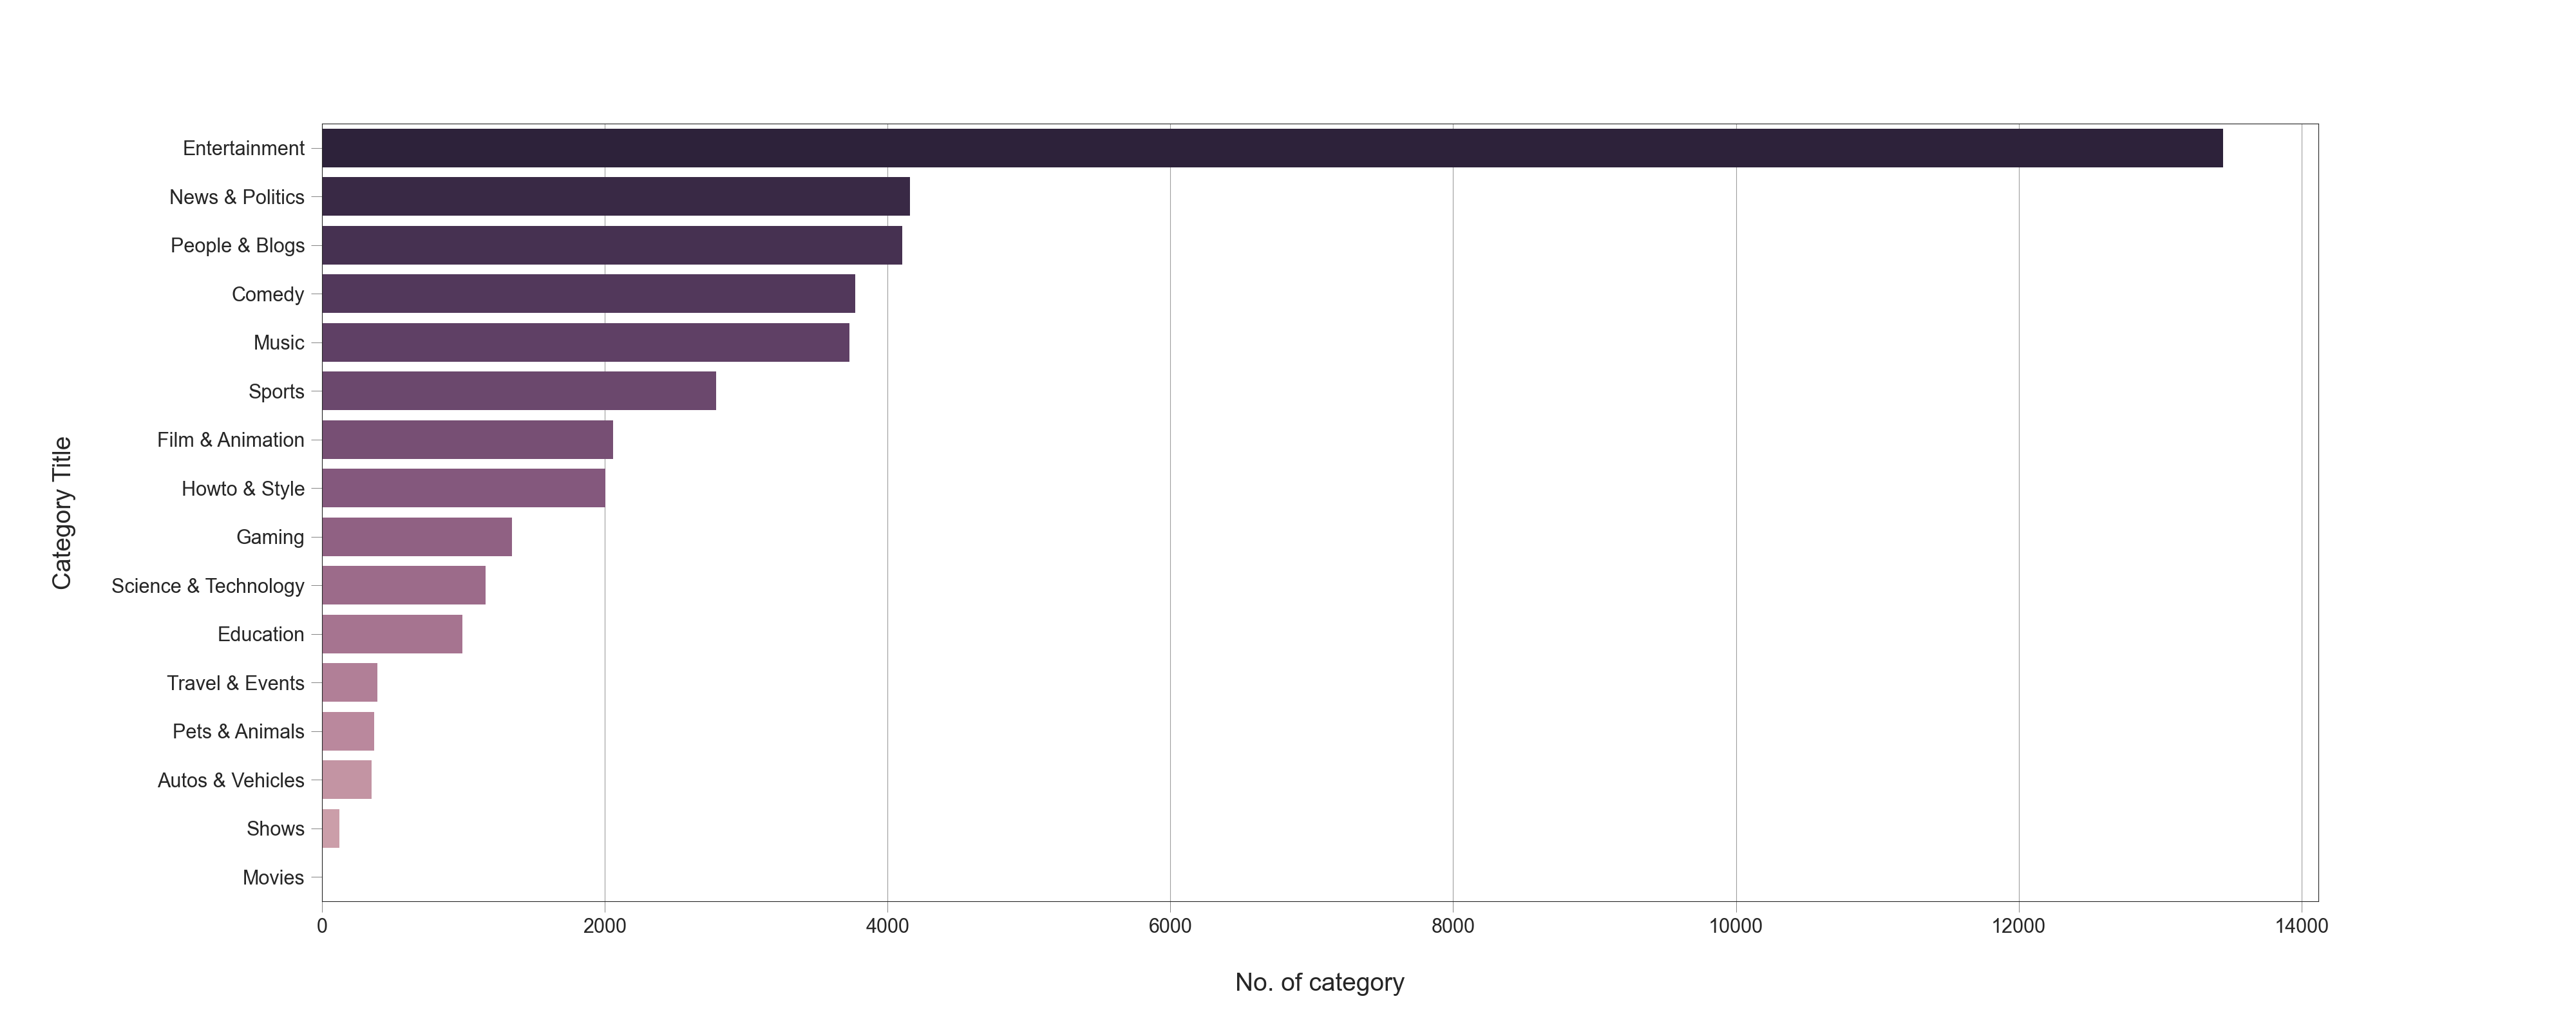

In [34]:
#  3、Which category_title have the largest number of trending videos?
cdf = df.groupby("category_title").size().reset_index(name="category_count") \
    .sort_values("category_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(20,8))
_ = sns.barplot(x="category_count", y="category_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of category", ylabel="Category Title")

<IPython.core.display.Javascript object>


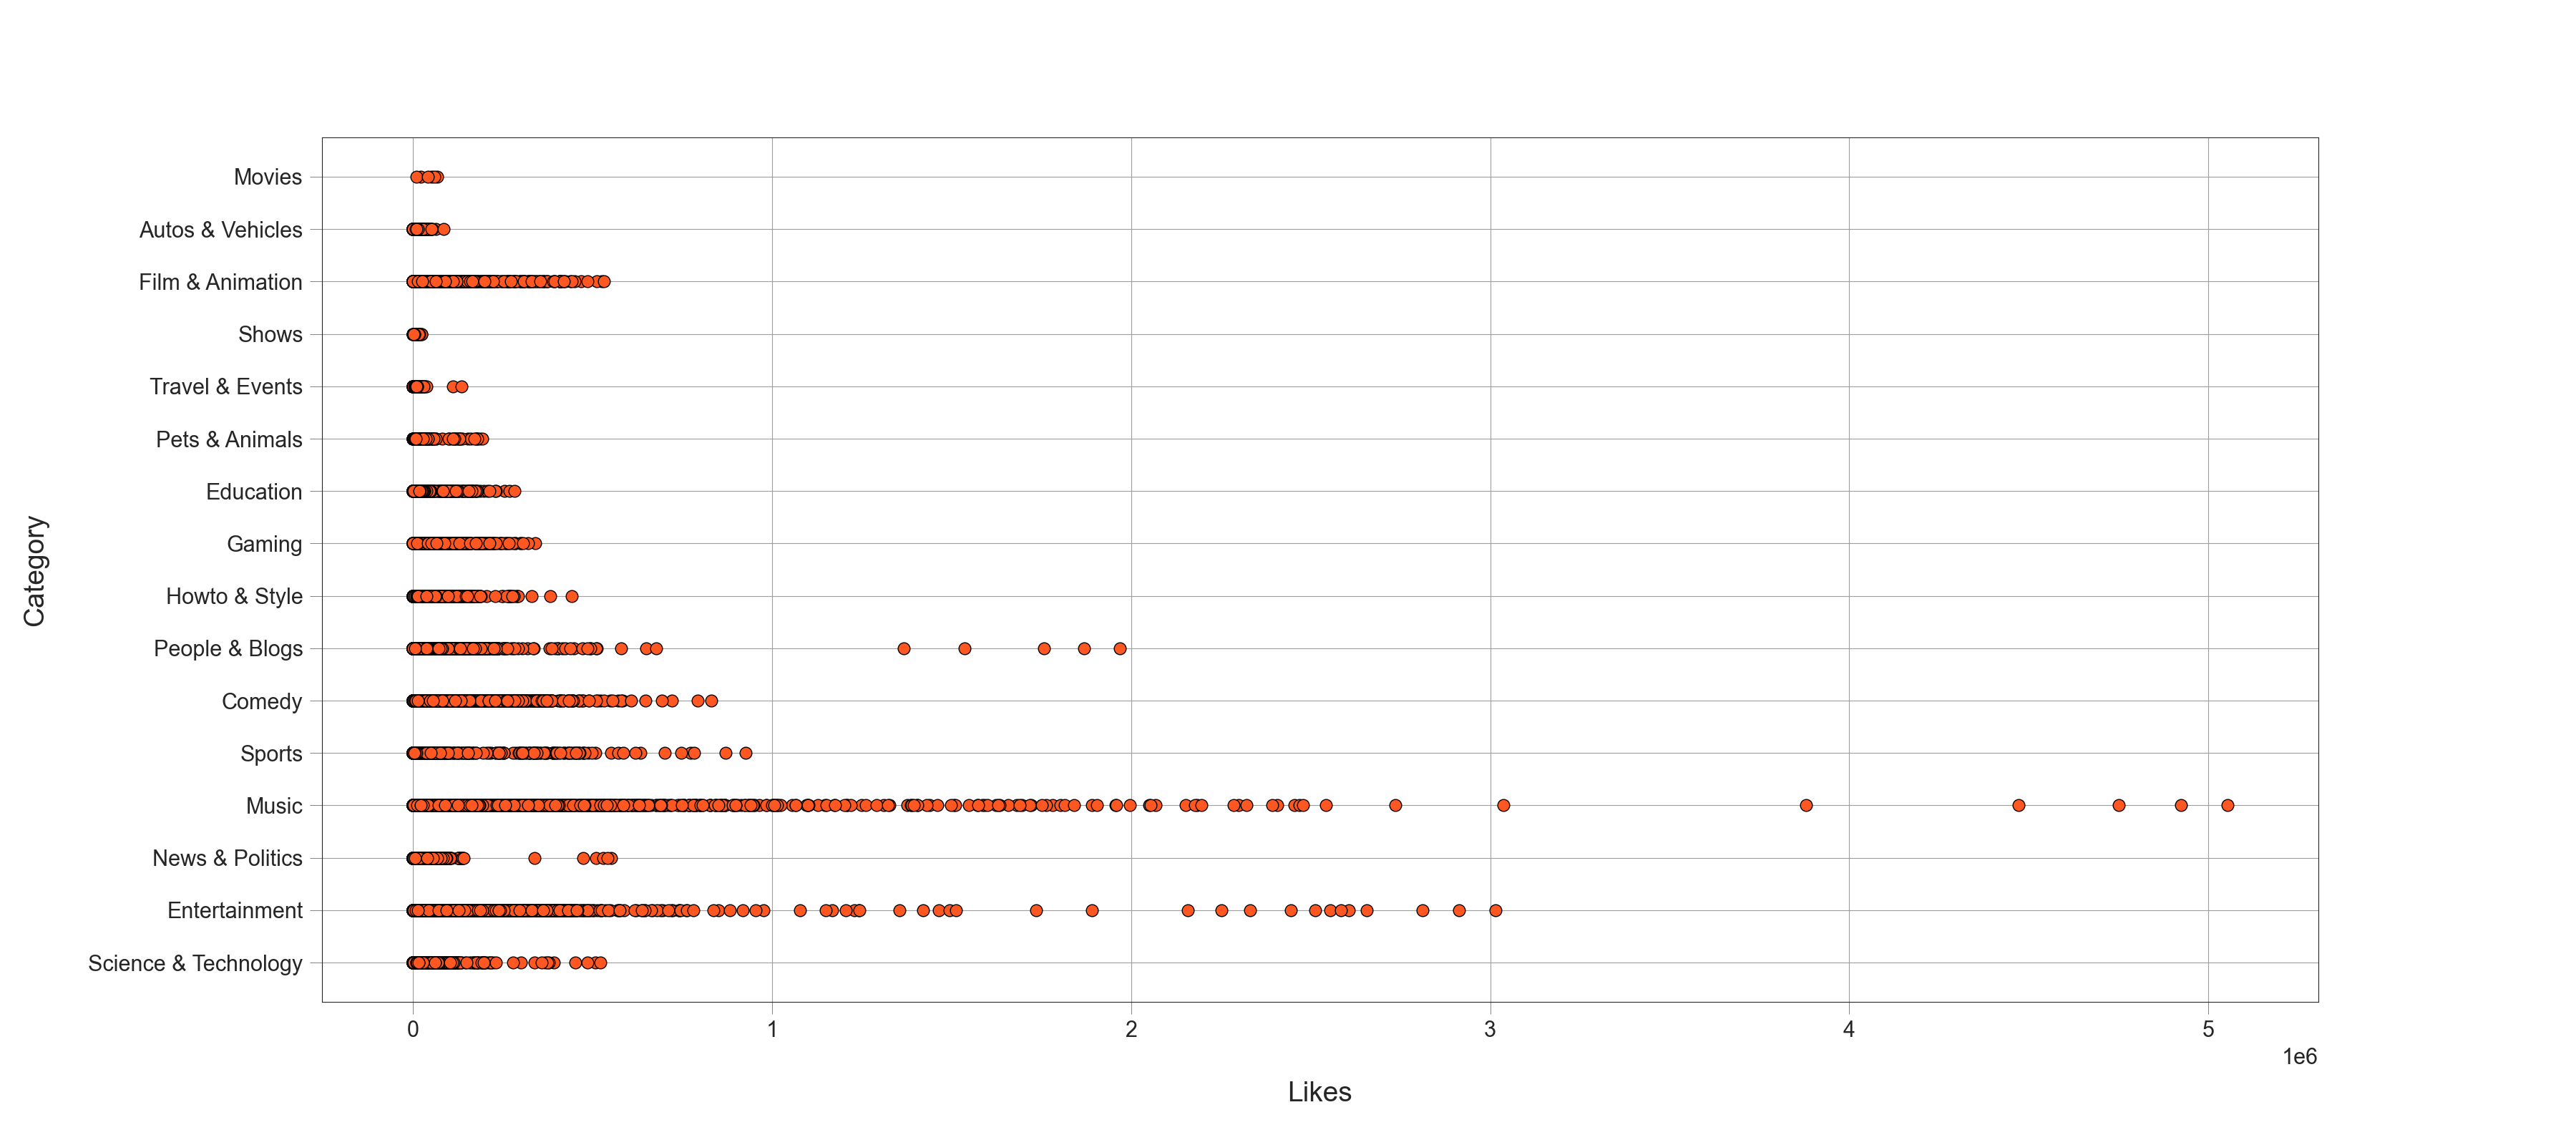

In [29]:
# visualize the relationship between category_title and likes
fig, ax = plt.subplots(figsize=(18,8))
_ = plt.scatter( x=df['likes'],y=df['category_title'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(ylabel="Category", xlabel="Likes")

<IPython.core.display.Javascript object>


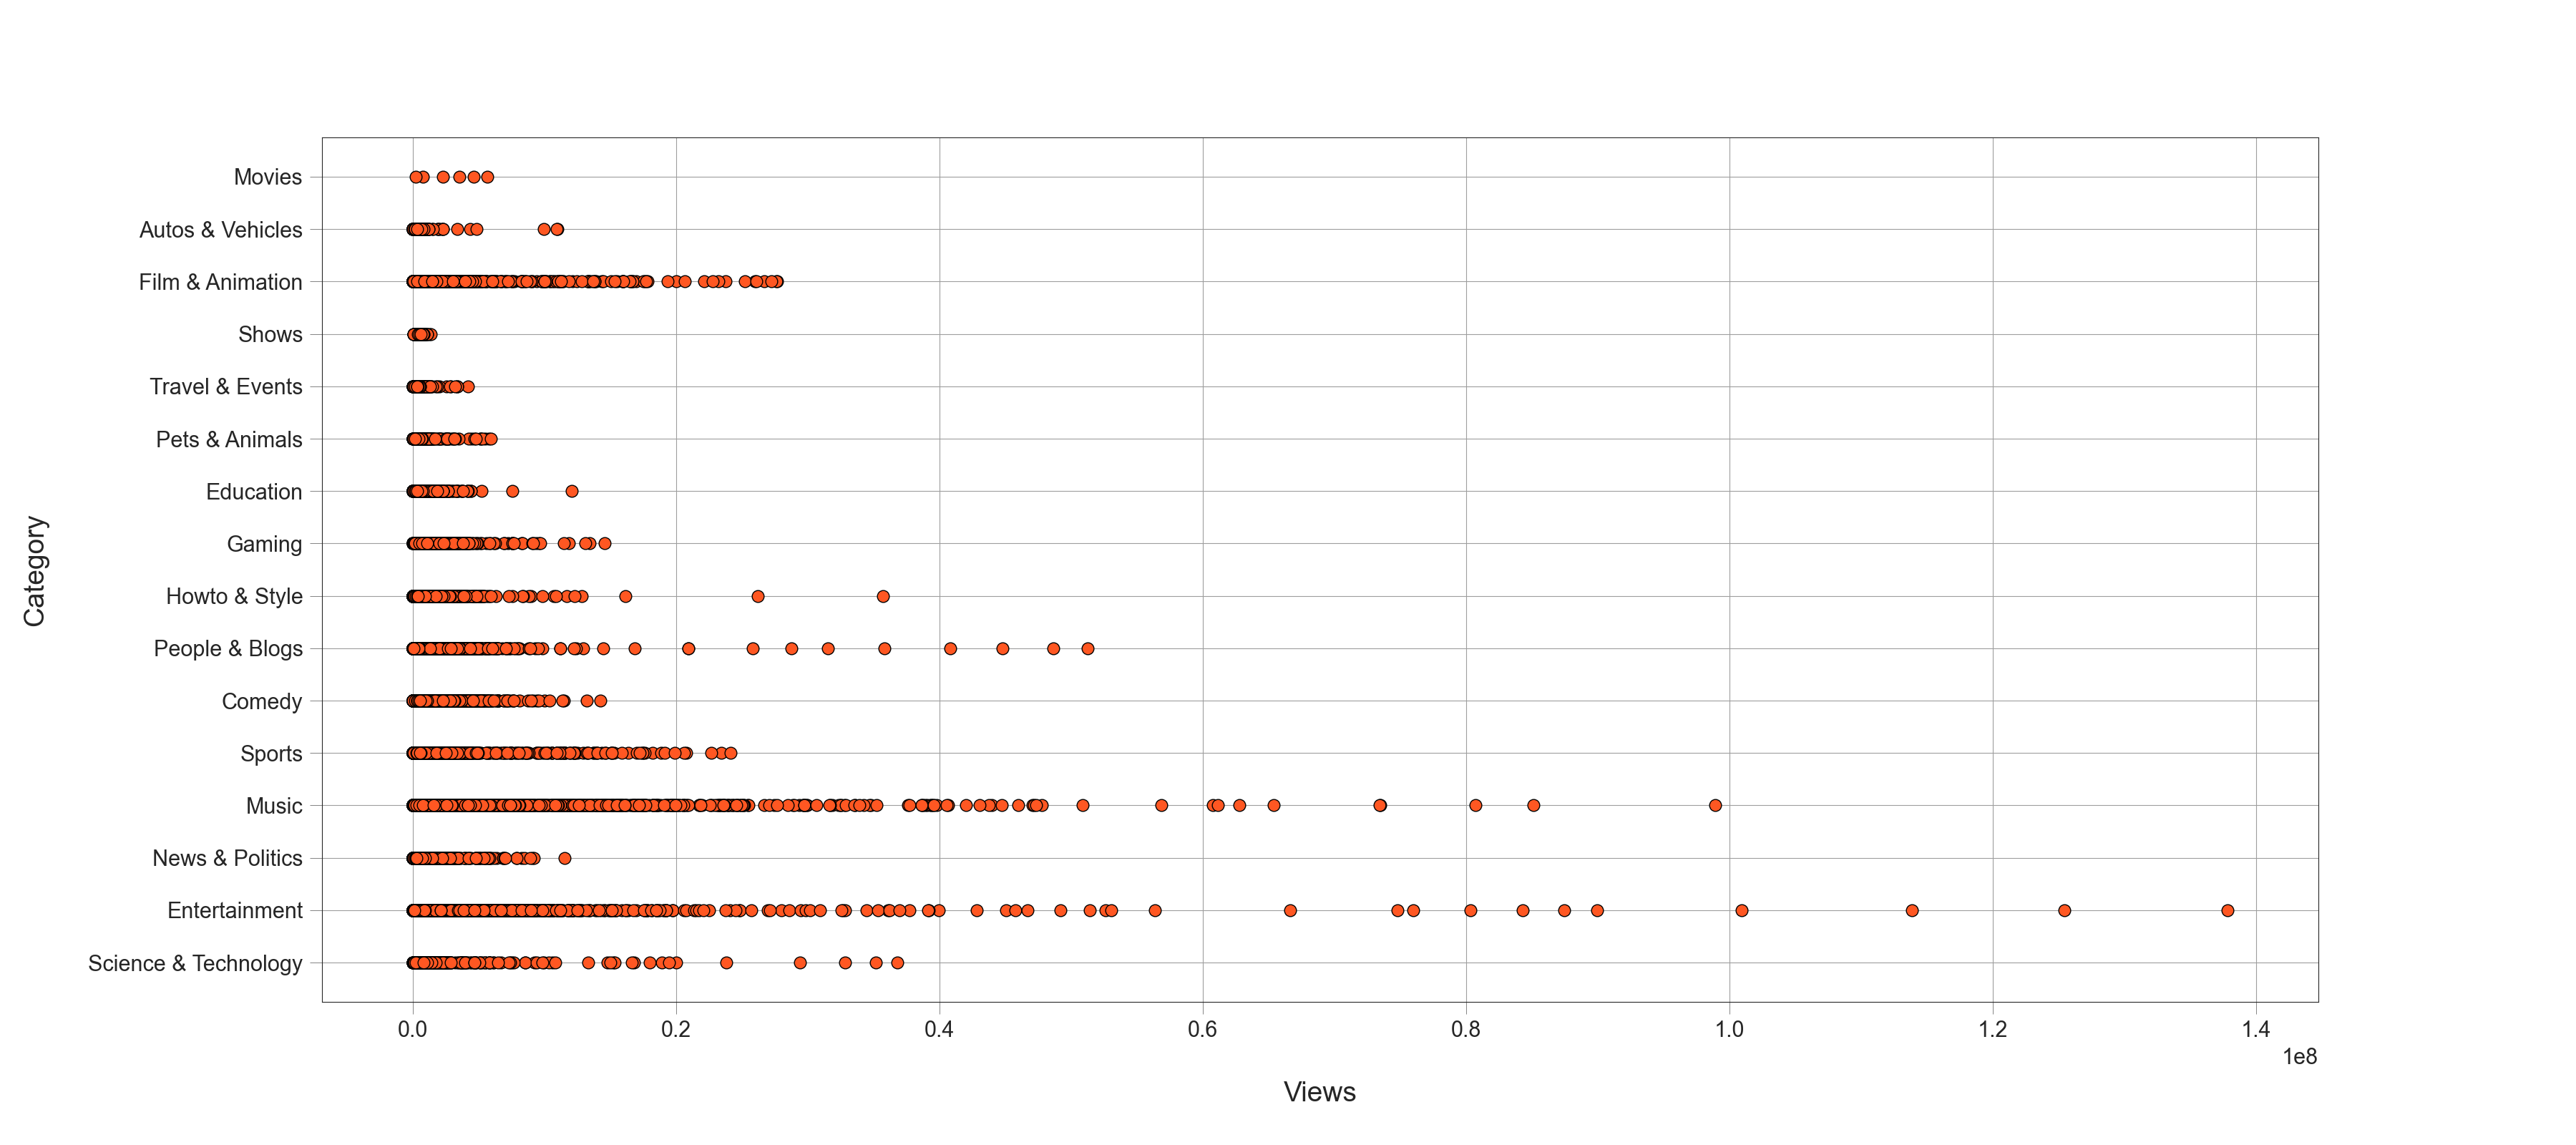

In [30]:
# visualize the relationship between category_title and views
fig, ax = plt.subplots(figsize=(18,8))
_ = plt.scatter( x=df['views'],y=df['category_title'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(ylabel="Category", xlabel="Views")

### publish_time

In [37]:
# Trending videos and their publishing time
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

<IPython.core.display.Javascript object>


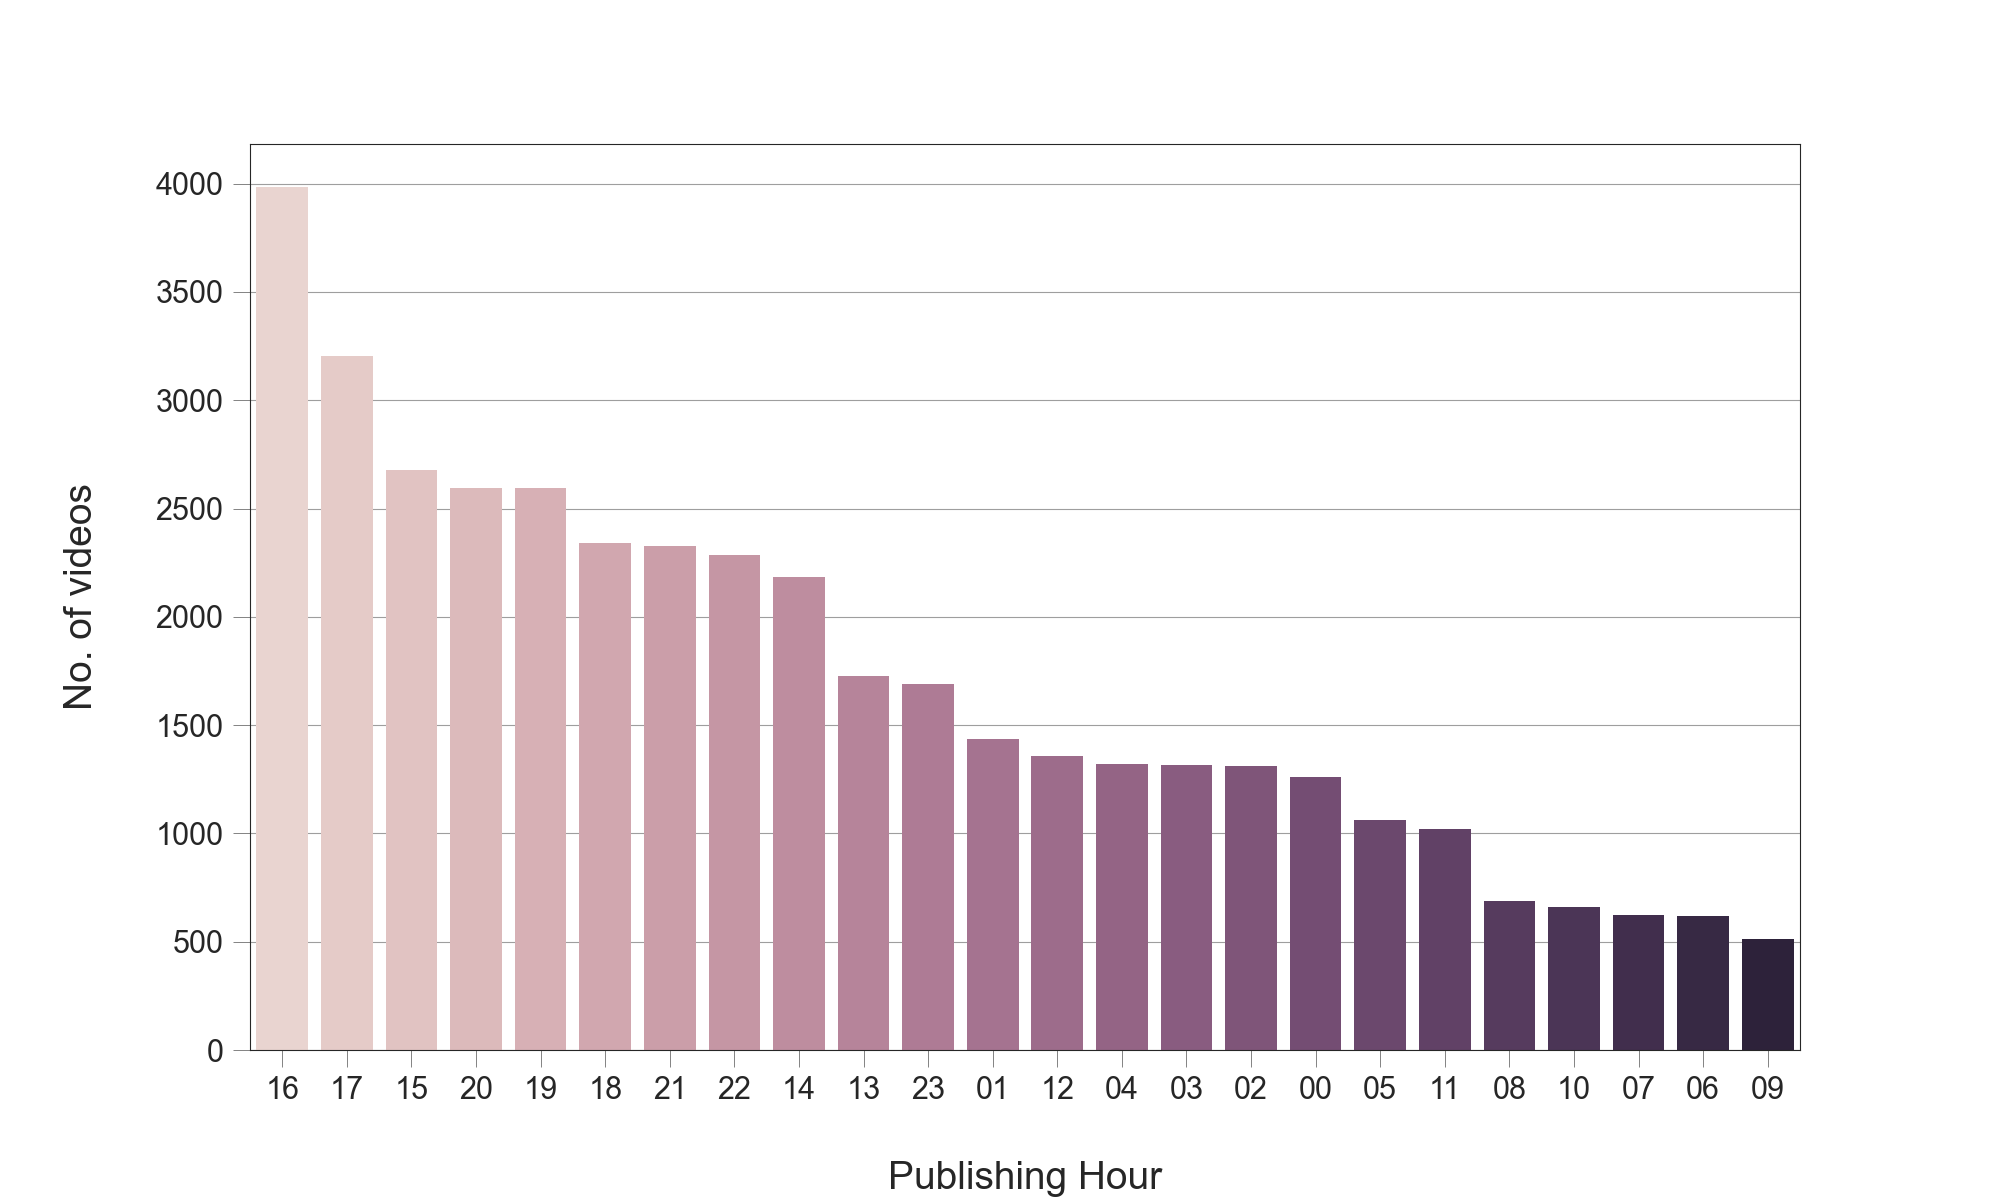

In [44]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

### correlation

In [35]:
# correlation table
df.corr()

category_id  views  likes  dislikes  comment_count  \
category_id           1.00  -0.14  -0.15     -0.03          -0.08   
views                -0.14   1.00   0.83      0.56           0.71   
likes                -0.15   0.83   1.00      0.45           0.84   
dislikes             -0.03   0.56   0.45      1.00           0.62   
comment_count        -0.08   0.71   0.84      0.62           1.00   
title_length         -0.05  -0.01  -0.09     -0.01          -0.06   

               title_length  
category_id           -0.05  
views                 -0.01  
likes                 -0.09  
dislikes              -0.01  
comment_count         -0.06  
title_length           1.00

<IPython.core.display.Javascript object>


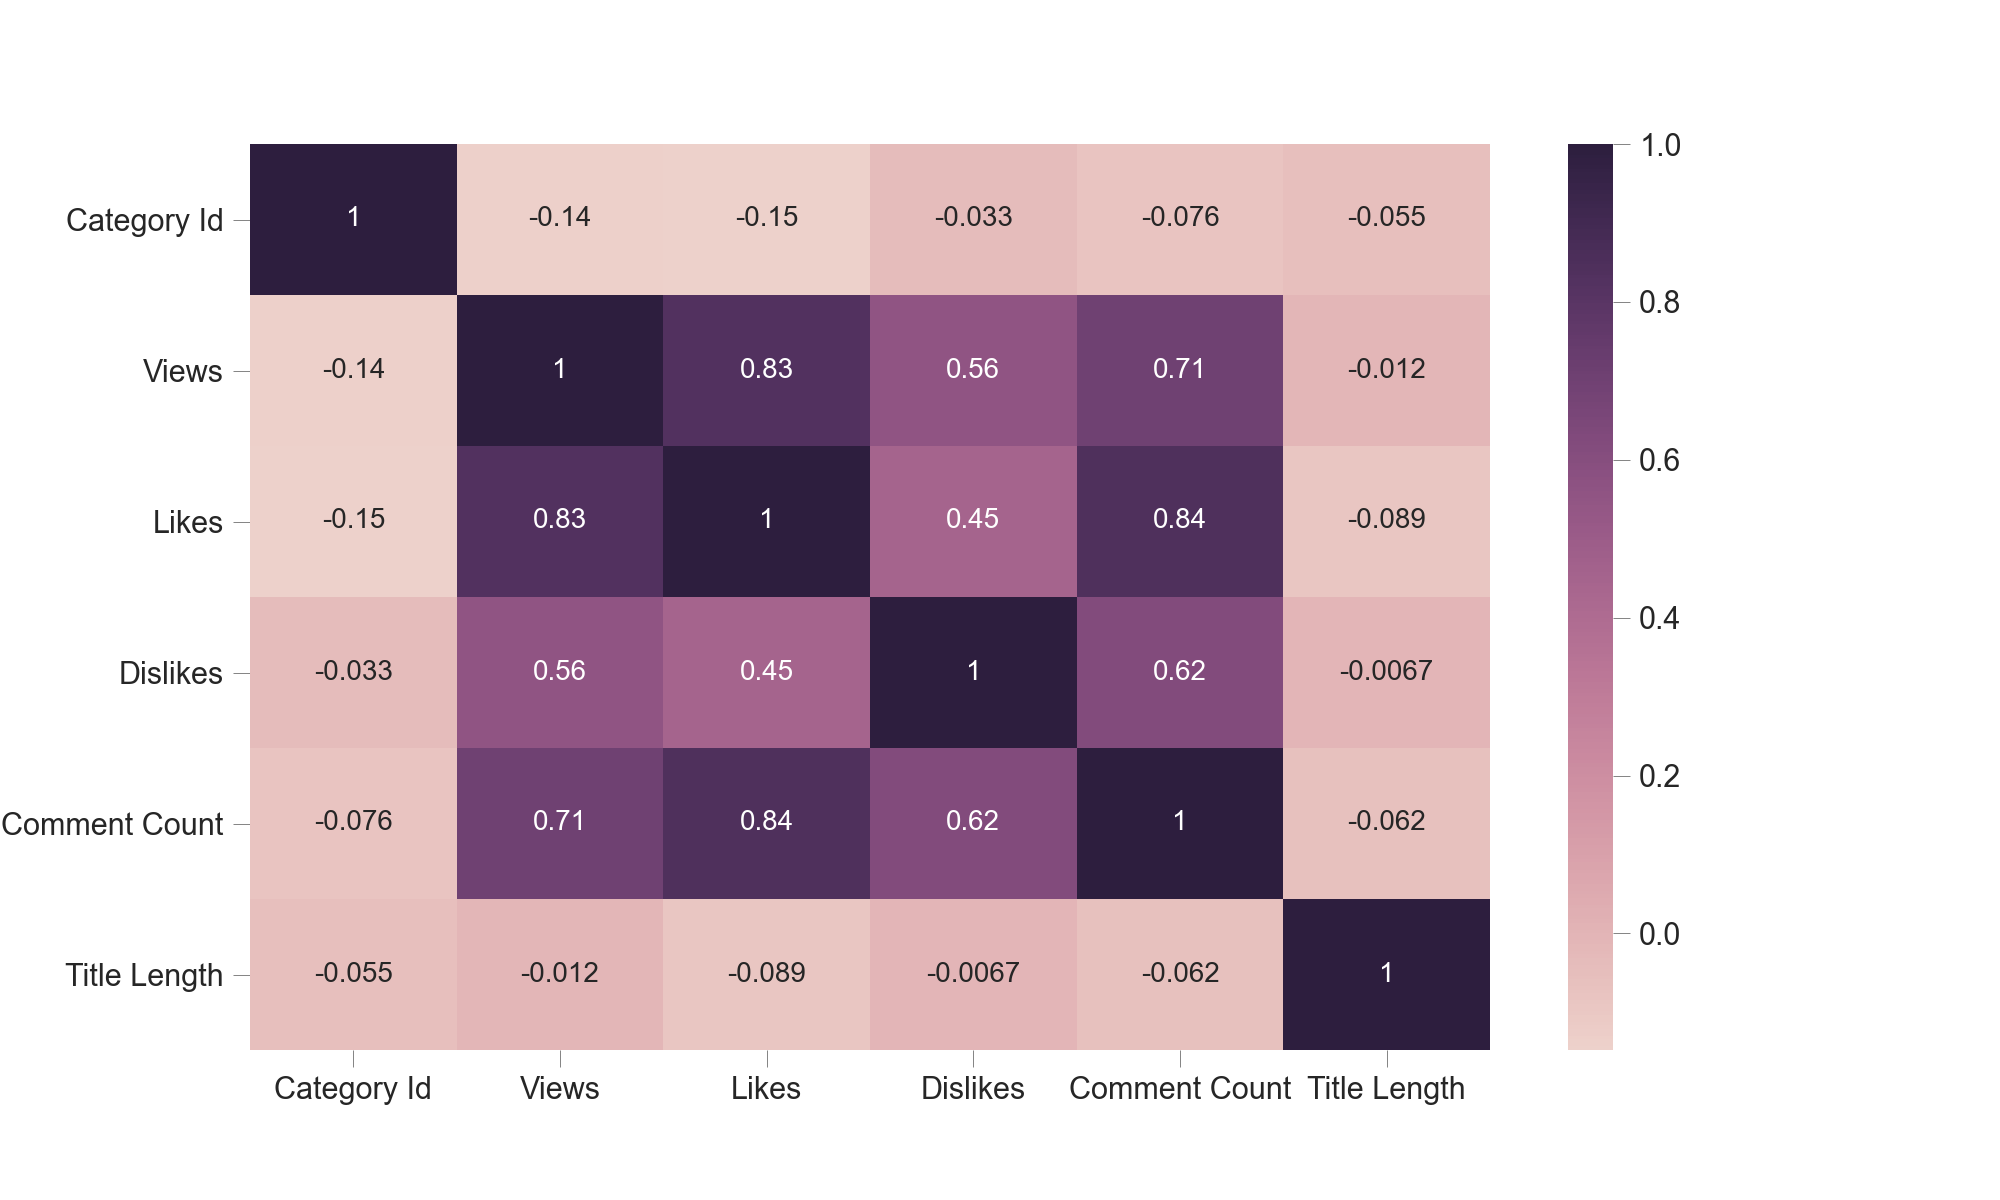

In [36]:
# visualize the correlation table
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)